In [14]:
import Pkg
Pkg.add("Plots")
using Plots 

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [1]:
function lagrange_coefficients(xvalue::Float64, x::Vector, k::Int)::Float64

    n = length(x)
    numerator = 1
    denominator = 1

    for j = 1:n
        if j != k
            numerator = numerator * (xvalue - x[j])
            denominator = denominator * (x[k] - x[j])
        end
    end

    return numerator / denominator
end

lagrange_coefficients (generic function with 1 method)

In [2]:
function lagrange_polynomial(points::Vector{Vector{Float64}}, x::Float64)
    """
    Polynomial Interpolation, with lagrange polynomials.

    Parameters
    ----------
    points: list of points [x, y] to interpolate.
    x: point to interpolate.
    
    Returns
    -------
    y: interpolated value.
    """

    y = 0.0
    xpoints = [points[i][1] for i in 1:length(points)]
    ypoints = [points[i][2] for i in 1:length(points)]

    for k in 1:length(points)
        pointx = xpoints[k]
        pointy = ypoints[k]

        y += pointy * lagrange_coefficients(x, xpoints, k)
    end

    return y 
end

lagrange_polynomial (generic function with 1 method)

In [16]:
points1 = [[1.0, 0.0], [2.0, -3.0], [4.0, 1.0]]
x = 2.0
lagrange_polynomial(points1, x)

-3.0

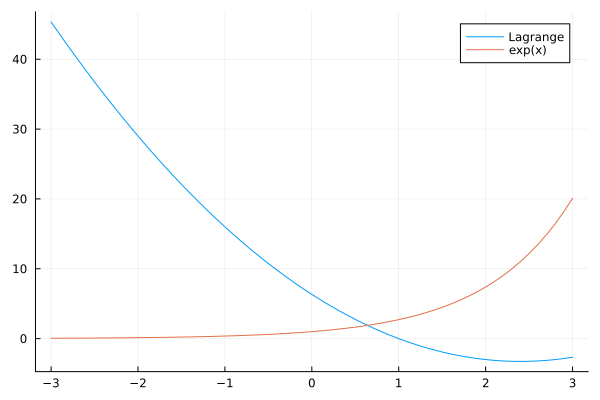

In [28]:
xdomain = -3:0.1:3
y = [lagrange_polynomial(points1, x) for x in xdomain]

plot(xdomain, y, label="Lagrange")
plot!(xdomain, exp, label="exp(x)")

In [21]:
points2 = [[1.0, 0.0], [4.0, 1.386294], [6, 1.791759]]

x = 2.0
lagrange_polynomial(points2, x)

0.5658441999999999

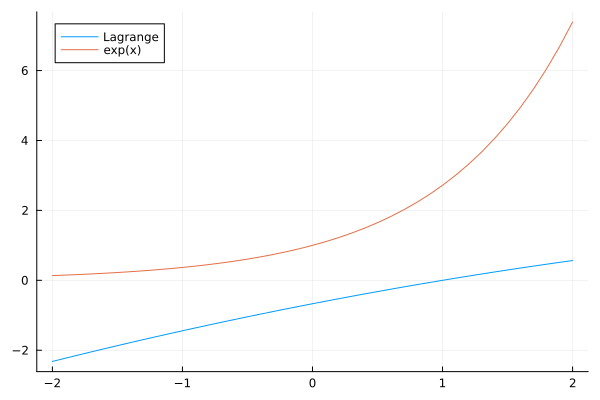

In [30]:
xdomain = -2:0.1:2
y = [lagrange_polynomial(points2, x) for x in xdomain]

plot(xdomain, y, label="Lagrange")
plot!(xdomain, exp, label="exp(x)")